In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas_datareader.wb as wb
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
indicators_raw = wb.download(indicator=["SP.DYN.LE00.IN", "NY.GDP.PCAP.CD", "SE.ADT.LITR.ZS", \
                                        "SH.MED.BEDS.ZS", "SL.TLF.CACT.MA.ZS", "SL.TLF.CACT.FE.ZS"], \
                             country="SGP", start=1990, end=2018)

#rename columns
indicators_raw.columns = ["Life_Expectancy", "GDP_per_capita", "Literacy_Rate", \
                          "Hosp_Beds_per_1000", "Labour_Force_Female", "Labour_Force_Male"]
indicators = indicators_raw.sort_index(level=1, ascending=True)
print(indicators)

                Life_Expectancy  GDP_per_capita  Literacy_Rate  \
country   year                                                   
Singapore 1990        75.295122    11861.756159       89.09600   
          1991        75.646341    14502.379994            NaN   
          1992        75.946341    16135.913653            NaN   
          1993        76.046341    18290.028237            NaN   
          1994        76.197561    21553.030900            NaN   
          1995        76.295122    24914.411256            NaN   
          1996        76.595122    26233.628896            NaN   
          1997        76.897561    26375.971950            NaN   
          1998        77.300000    21829.299870            NaN   
          1999        77.551220    21796.084436            NaN   
          2000        77.951220    23852.327029       92.54940   
          2001        78.251220    21700.020046            NaN   
          2002        78.551220    22159.688863            NaN   
          

In [23]:
print("Literacy_Rate and Hosp_Beds were dropped due to large missing data.")

Literacy_Rate and Hosp_Beds were dropped due to large missing data.


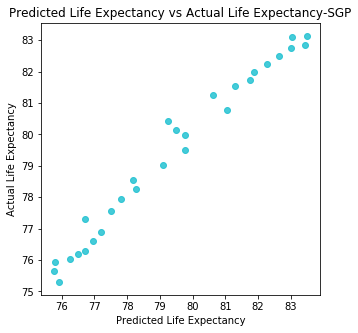

Gradient of line through scatterplot looks close to 1.


In [24]:
X = indicators[["GDP_per_capita", "Labour_Force_Female", "Labour_Force_Male"]]
y = indicators[["Life_Expectancy"]]

#normalising independent variables
scaler = StandardScaler()
scaler.fit_transform(X)

#fitting Linear Regression
linear = LinearRegression()
linear.fit(X, y)
y_predict = linear.predict(X)

fig = plt.figure(figsize=(5,5))
plt.scatter(y_predict, y, color="tab:cyan", alpha=0.8)
plt.xlabel("Predicted Life Expectancy")
plt.ylabel("Actual Life Expectancy")
plt.title("Predicted Life Expectancy vs Actual Life Expectancy-SGP")
plt.show()

print("Gradient of line through scatterplot looks close to 1.")

In [25]:
Rsquared = linear.score(X, y)
coefficients = linear.coef_
print(coefficients)
print("Score of Linear Regression (Rsquared) : {:.4f}".format(Rsquared))

[[-1.83538260e-05 -9.55444609e-01  5.66864133e-01]]
Score of Linear Regression (Rsquared) : 0.9764


In [26]:
#Fitting a subsequent model of splitting the data into training and testing sets   

X_1 = indicators[["GDP_per_capita", "Labour_Force_Female", "Labour_Force_Male"]]
y_1 = indicators[["Life_Expectancy"]]

X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, train_size=0.8, \
                                                            test_size=0.2, random_state=6)
print(X_1_train.shape)
print(X_1_test.shape)
print(y_1_train.shape)
print(y_1_test.shape)

(23, 3)
(6, 3)
(23, 1)
(6, 1)


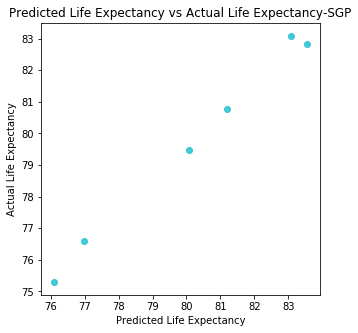

Gradient of line through scatterplot looks close to 1.


In [27]:
scaler = StandardScaler()
scaler.fit_transform(X_1_train)
scaler.transform(X_1_test)

mlr = LinearRegression()
mlr.fit(X_1_train, y_1_train)
y_1_predict = mlr.predict(X_1_test)

fig = plt.figure(figsize=(5,5))
plt.scatter(y_1_predict, y_1_test, color="tab:cyan", alpha=0.8)
plt.xlabel("Predicted Life Expectancy")
plt.ylabel("Actual Life Expectancy")
plt.title("Predicted Life Expectancy vs Actual Life Expectancy-SGP")
plt.show()

print("Gradient of line through scatterplot looks close to 1.")

In [28]:
mlr_coefficients = mlr.coef_
Rsquared = mlr.score(X_1_train, y_1_train)

print(mlr_coefficients)
print("Score of Linear Regression (Rsquared) : {:.4f}".format(Rsquared))

[[-2.90646880e-05 -1.08369374e+00  5.97108058e-01]]
Score of Linear Regression (Rsquared) : 0.9772
